In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score
from xgboost import XGBRegressor
import optuna
import shap
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")

In [4]:

df = pd.read_csv('C:/Users/Admin/IMDb Movies India.csv', encoding='ISO-8859-1')
df.dropna(inplace=True)
print(df.head())

                                 Name    Year Duration  \
1  #Gadhvi (He thought he was Gandhi) -2019.0  109 min   
3                             #Yaaram -2019.0  110 min   
5                ...Aur Pyaar Ho Gaya -1997.0  147 min   
6                           ...Yahaan -2005.0  142 min   
8                  ?: A Question Mark -2012.0   82 min   

                       Genre  Rating  Votes        Director          Actor 1  \
1                      Drama     7.0      8   Gaurav Bakshi     Rasika Dugal   
3            Comedy, Romance     4.4     35      Ovais Khan          Prateik   
5     Comedy, Drama, Musical     4.7    827    Rahul Rawail       Bobby Deol   
6        Drama, Romance, War     7.4  1,086  Shoojit Sircar  Jimmy Sheirgill   
8  Horror, Mystery, Thriller     5.6    326   Allyson Patel        Yash Dave   

                  Actor 2          Actor 3  
1          Vivek Ghamande    Arvind Jangid  
3              Ishita Raj  Siddhant Kapoor  
5  Aishwarya Rai Bachchan    Shammi

In [5]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [6]:
df.shape

(5653, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5653 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5653 non-null   object 
 1   Year      5653 non-null   float64
 2   Duration  5653 non-null   object 
 3   Genre     5653 non-null   object 
 4   Rating    5653 non-null   float64
 5   Votes     5653 non-null   object 
 6   Director  5653 non-null   object 
 7   Actor 1   5653 non-null   object 
 8   Actor 2   5653 non-null   object 
 9   Actor 3   5653 non-null   object 
dtypes: float64(2), object(8)
memory usage: 485.8+ KB


In [8]:
df.describe(include='all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,5653,5653.00000,5653,5653,5653.000000,5653,5653,5653,5653,5653
unique,5379,NaN,174,375,NaN,2025,2427,1955,2317,2551
top,Zindagi,NaN,120 min,Drama,NaN,7,David Dhawan,Amitabh Bachchan,Rekha,Pran
freq,4,NaN,169,844,NaN,90,41,104,52,57
mean,NaN,-1996.23262,NaN,NaN,5.897806,NaN,NaN,NaN,NaN,NaN
std,NaN,19.74586,NaN,NaN,1.381307,NaN,NaN,NaN,NaN,NaN
min,NaN,-2021.00000,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,-2013.00000,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,-2002.00000,NaN,NaN,6.100000,NaN,NaN,NaN,NaN,NaN
75%,NaN,-1983.00000,NaN,NaN,6.900000,NaN,NaN,NaN,NaN,NaN


In [10]:
# Explorartory Data Analysis
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

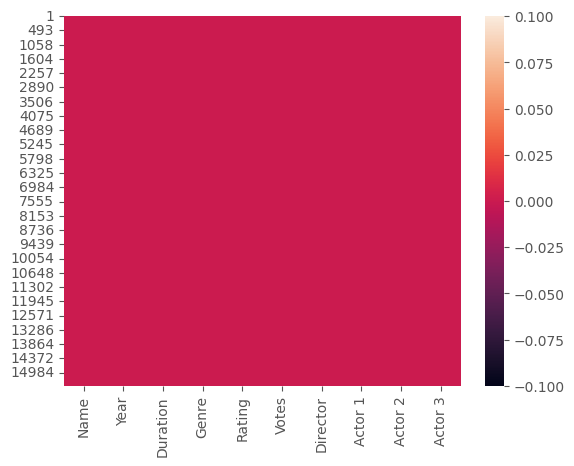

In [11]:
sns.heatmap(df.isnull());

In [12]:
missing_count = df.isnull().sum().sort_values(ascending=False)
missing_percent = (round(df.isnull().sum()/df.isnull().count(), 4)*100).sort_values(ascending=False)
missing_data = pd.concat([missing_count, missing_percent], 
                       axis=1, 
                       keys=['missing_count', 'missing_percent'])
missing_data

,missing_count,missing_percent
Name,0,0.0
Year,0,0.0
Duration,0,0.0
Genre,0,0.0
Rating,0,0.0
Votes,0,0.0
Director,0,0.0
Actor 1,0,0.0
Actor 2,0,0.0
Actor 3,0,0.0


In [13]:
df.dropna(subset=['Rating'], inplace=True)

(round(df.isnull().sum()/df.isnull().count(), 4)*100).sort_values(ascending=False)

Name        0.0
Year        0.0
Duration    0.0
Genre       0.0
Rating      0.0
Votes       0.0
Director    0.0
Actor 1     0.0
Actor 2     0.0
Actor 3     0.0
dtype: float64

In [14]:
df['Duration'] = pd.to_numeric(df['Duration'].str.strip(' min'))
df['Duration'].fillna(df['Duration'].mean(), inplace=True)

df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [15]:
df.drop_duplicates(inplace=True)
df.shape

(5653, 10)

In [16]:
df['Year'] = df['Year'].apply(lambda x: x.split(')')[0])

year_lst = []
for val in df['Year']:
    if len(val.split('(')) == 1:
        year_lst.append(val.split('(')[0])
    elif len(val.split('(')) > 1:
        year_lst.append(val.split('(')[1])
df['Year'] = year_lst

AttributeError: 'float' object has no attribute 'split'

In [17]:

df[df['Votes']>100000]

TypeError: '>' not supported between instances of 'str' and 'int'